In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np

In [29]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Define constants
IMAGE_SIZE = (299,299)
BATCH_SIZE = 16
EPOCHS = 19
NUM_CLASSES = 8  # Number of classes

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    'train',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',  # Use categorical mode for multi-class classification
    shuffle=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    'test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

# Load pre-trained VGG16 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)  # Use softmax activation for multi-class classification

# Combine base model and custom layers
model = Model(inputs=base_model.input, outputs=predictions)
 




Found 8472 images belonging to 8 classes.
Found 2073 images belonging to 8 classes.


In [30]:
class_indices = train_generator.class_indices
class_indices

{'Apple Scab': 0,
 'Black Rot': 1,
 'Blotch_Apple': 2,
 'Cedar Apple Rust': 3,
 'Healthy': 4,
 'Normal_Apple': 5,
 'Rot_Apple': 6,
 'Scab_Apple': 7}

In [31]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 299, 299, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_94 (Conv2D)            │ (None, 149, 149, 32)      │             864 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_94        │ (None, 149, 149, 32)      │              96 │ conv2d_94[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_94 (Activation)    │ (None, 149, 149, 32)      │               0 │ batch_normalization_94[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_95 (Conv2D)            │ (None, 147, 147, 32)      │           9,216 │ activation_94[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_95        │ (None, 147, 147, 32)      │              96 │ conv2d_95[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_95 (Activation)    │ (None, 147, 147, 32)      │               0 │ batch_normalization_95[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_96 (Conv2D)            │ (None, 147, 147, 64)      │          18,432 │ activation_95[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_96        │ (None, 147, 147, 64)      │             192 │ conv2d_96[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_96 (Activation)    │ (None, 147, 147, 64)      │               0 │ batch_normalization_96[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_4               │ (None, 73, 73, 64)        │               0 │ activation_96[0][0]        │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_97 (Conv2D)            │ (None, 73, 73, 80)        │           5,120 │ max_pooling2d_4[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_97        │ (None, 73, 73, 80)        │             240 │ conv2d_97[0][0]            │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_97 (Activation)    │ (None, 73, 73, 80)        │               0 │ batch_normalization_97[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_98 (Conv2D)            │ (None, 71, 71, 192)       │         138,24

 Total params: 22,329,384 (85.18 MB)

 Trainable params: 526,600 (2.01 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [32]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.n // BATCH_SIZE
)



Epoch 1/19


C:\Users\Nikhil Patel\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


529/529 ━━━━━━━━━━━━━━━━━━━━ 776s 1s/step - accuracy: 0.5855 - loss: 1.1186 - val_accuracy: 0.8924 - val_loss: 0.3814
Epoch 2/19
  1/529 ━━━━━━━━━━━━━━━━━━━━ 6:54 784ms/step - accuracy: 0.8750 - loss: 0.3097

C:\Users\Nikhil Patel\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


529/529 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8750 - loss: 0.3097 - val_accuracy: 0.5556 - val_loss: 1.1284
Epoch 3/19
529/529 ━━━━━━━━━━━━━━━━━━━━ 7216s 14s/step - accuracy: 0.8802 - loss: 0.3716 - val_accuracy: 0.9181 - val_loss: 0.2550
Epoch 4/19
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 557us/step - accuracy: 0.9375 - loss: 0.2732 - val_accuracy: 0.7778 - val_loss: 0.6806
Epoch 5/19
529/529 ━━━━━━━━━━━━━━━━━━━━ 297s 558ms/step - accuracy: 0.9059 - loss: 0.2718 - val_accuracy: 0.9385 - val_loss: 0.1947
Epoch 6/19
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.9375 - loss: 0.1111 - val_accuracy: 0.8889 - val_loss: 0.6369
Epoch 7/19
529/529 ━━━━━━━━━━━━━━━━━━━━ 307s 577ms/step - accuracy: 0.9236 - loss: 0.2301 - val_accuracy: 0.9249 - val_loss: 0.2190
Epoch 8/19
529/529 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.8750 - loss: 0.2042 - val_accuracy: 0.7778 - val_loss: 0.6274
Epoch 9/19
529/529 ━━━━━━━━━━━━━━━━━━━━ 318s 599ms/step - accuracy: 0.9320 - loss: 0.1958 - val_ac

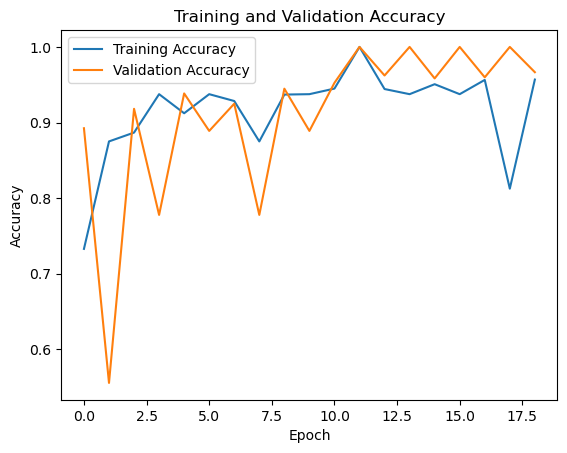

In [33]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


In [40]:
image_path = 'test/Healthy/044a96a2-d5ac-490b-8c57-2c1859cdf8f3___RS_HL 7991.JPG'

In [41]:
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(299, 299))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize
    return img_array
img_array = preprocess_image(image_path)
    
    # Perform prediction
prediction = model.predict(img_array)
    
    # Get predicted class label
class_index = np.argmax(prediction)

class_labels = ['Apple Scab', 'Black Rot', 'Blotch_Apple', 'Cedar Apple Rust', 'Healthy', 'Normal_Apple', 'Rot_Apple', 'Scab_Apple']
    
    # Get the predicted class label
predicted_class = class_labels[class_index]
    
predicted_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


'Healthy'

In [37]:
# Save the trained model
model.save('fruit_leaf_classification_insception_20_model.keras')
